In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from matplotlib.colors import ListedColormap

In [31]:
data = pd.read_csv("Iris.csv")

In [32]:
df = pd.DataFrame(data)
print(df.head(10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


In [33]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [34]:
X = df.drop("Species", axis=1)
y = df["Species"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardization (Z-score: Mean = 0, Std = 1)

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

In [48]:
print(X_train_scaled_df)
print(X_test_scaled_df)

           Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0   -1.210307      -1.473937      1.220379      -1.563987     -1.309484
1   -1.372402      -0.133071      3.020017      -1.277280     -1.042922
2   -0.214583       1.085898      0.095606       0.385621      0.289886
3   -1.465027      -1.230143      0.770470      -1.219939     -1.309484
4   -0.747179      -1.717731      0.320560      -1.391963     -1.309484
..        ...            ...           ...            ...           ...
115 -0.075644       0.354517     -0.579258       0.156255      0.156605
116  0.734829      -1.108246     -1.254122       0.442962      0.689728
117 -1.395558      -0.011174      2.120198      -1.449304     -1.309484
118  0.410640      -0.011174     -1.029168       0.156255      0.023324
119  0.642204       1.573486     -0.129349       1.245742      1.222851

[120 rows x 5 columns]
          Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0  -0.029331       0.354517     -0.579258

In [51]:
# Initialize classifier with K=5 (default)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [58]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [59]:
y_pred = knn.predict(X_test_scaled)
target_names = le.classes_

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Full classification report (precision, recall, F1-score)
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



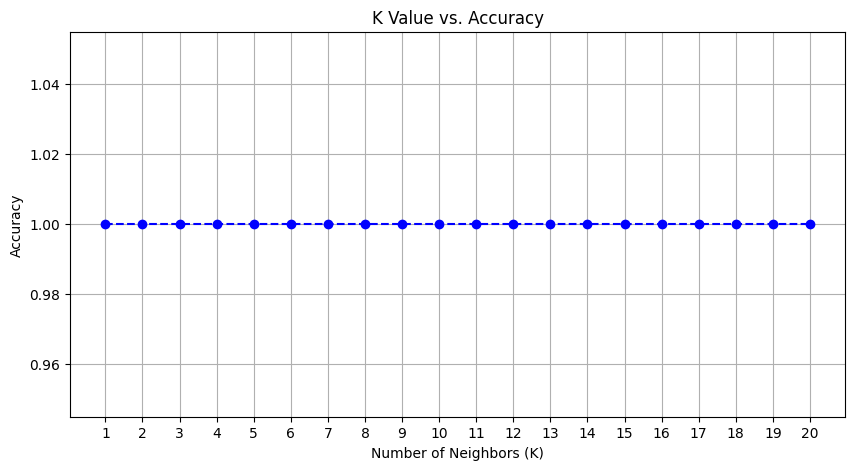

In [62]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)

# Plot accuracy vs. K
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
plt.title("K Value vs. Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()


Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


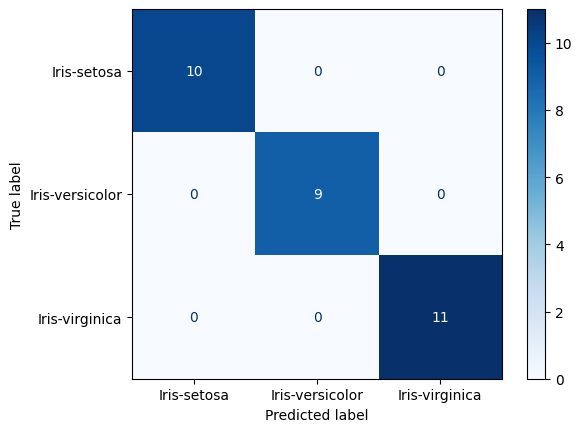

In [64]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)  # use actual class names if available
disp.plot(cmap='Blues')

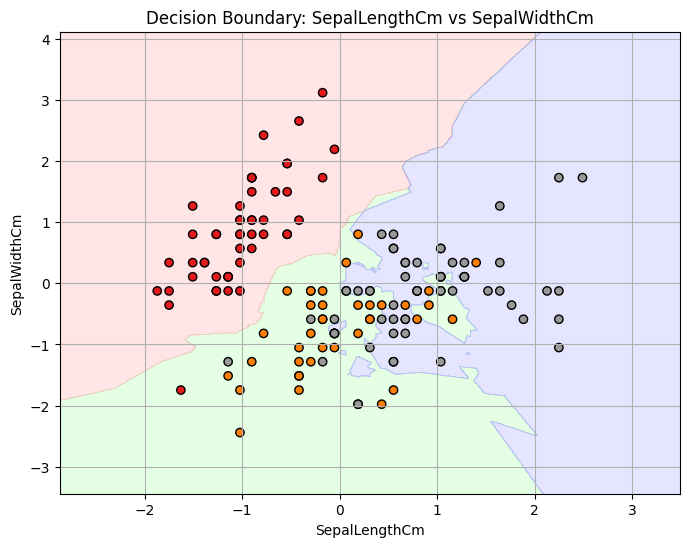

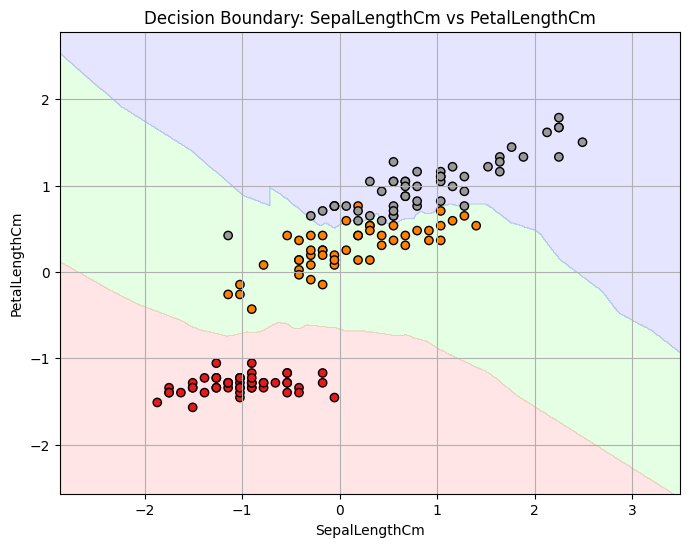

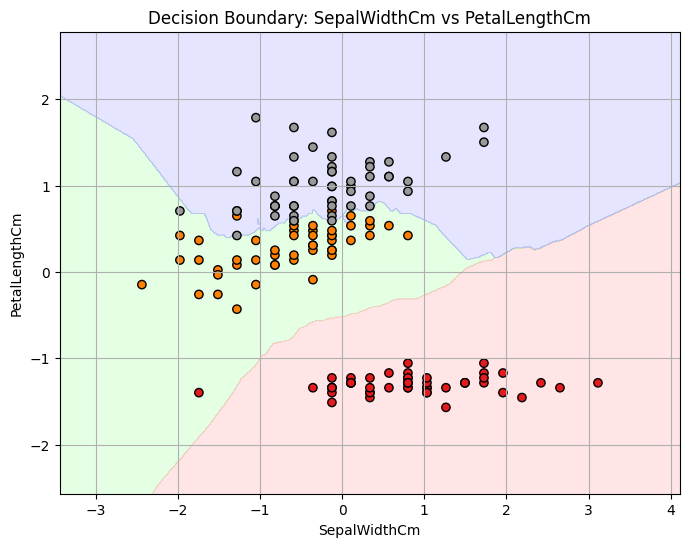

In [67]:
# Feature names
feature_names = X.columns.tolist()

# Feature combinations (3 features = 3 combinations)
combinations = [(1, 2), (1, 3), (2, 3)]

# Loop over combinations
for i, j in combinations:
    X_pair = X.iloc[:, [i, j]].values

    # Scale features
    scaler = StandardScaler()
    X_pair_scaled = scaler.fit_transform(X_pair)

    # Train classifier (choose KNN or DecisionTree)
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_pair_scaled, y_encoded)

    # Create meshgrid
    x_min, x_max = X_pair_scaled[:, 0].min() - 1, X_pair_scaled[:, 0].max() + 1
    y_min, y_max = X_pair_scaled[:, 1].min() - 1, X_pair_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(8, 6))
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    plt.scatter(X_pair_scaled[:, 0], X_pair_scaled[:, 1], c=y_encoded, edgecolor='k', cmap='Set1')
    plt.xlabel(feature_names[i])
    plt.ylabel(feature_names[j])
    plt.title(f"Decision Boundary: {feature_names[i]} vs {feature_names[j]}")
    plt.grid(True)
    plt.show()
